In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_context("talk")

# Exploratory Data Analysis

In [2]:
DATA_PATH = '../data/jigsaw-challenge/'

train_data = pd.read_csv(DATA_PATH + 'train.csv')
eda_df = train_data.copy()
train_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


## Sequence Length ($T_{x}$)

In [3]:
eda_df['Tx'] = eda_df.comment_text.str.split('[ \n]').str.len()
eda_df['n_chars'] = eda_df.comment_text.str.len()

In [4]:
tx_mean = eda_df.Tx.mean()
tx_median = eda_df.Tx.median()
tx_std = eda_df.Tx.std()

print(u'T_x Mean', tx_mean)
print(u'T_x Median', tx_median)
print(u'T_x Std', tx_std)

T_x Mean 70.38770202605737
T_x Median 38.0
T_x Std 104.11176019153748


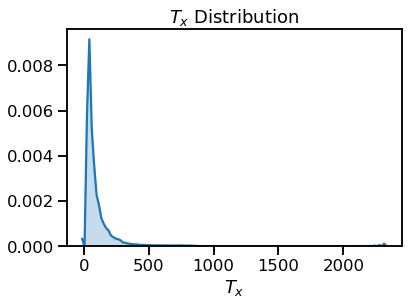

In [5]:
sns.kdeplot(eda_df['Tx'], shade=True, legend=False)
plt.title(u'$T_x$ Distribution')
plt.xlabel(u'$T_x$');

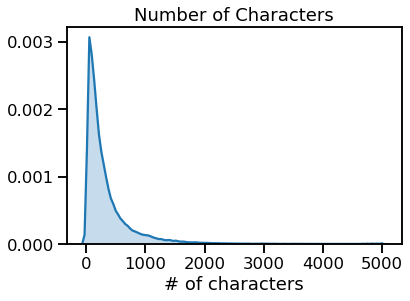

In [6]:
sns.kdeplot(eda_df['n_chars'], shade=True, legend=False)
plt.title(u'Number of Characters')
plt.xlabel(u'# of characters');

## Tags

In [7]:
tags = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

eda_df['n_tags'] = eda_df[tags].sum(axis=1)
eda_df['clean'] = np.where(eda_df['n_tags'] == 0, True, False)

In [8]:
n_clean = len(eda_df[eda_df.clean == True])
n_toxic = len(eda_df[eda_df.clean == False])
pct_toxic = n_toxic/len(eda_df)

print(f'Number of clean comments: {n_clean}')
print(f'Number of toxic comments: {n_toxic}')
print(f'Pct of toxic comments: {pct_toxic:.2f}')

Number of clean comments: 143346
Number of toxic comments: 16225
Pct of toxic comments: 0.10


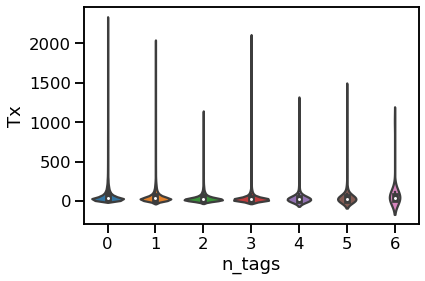

In [9]:
sns.violinplot(data=eda_df, x='n_tags', y='Tx', jitter=True)

Text(0.5, 1.0, 'Number of Tags per Comment')

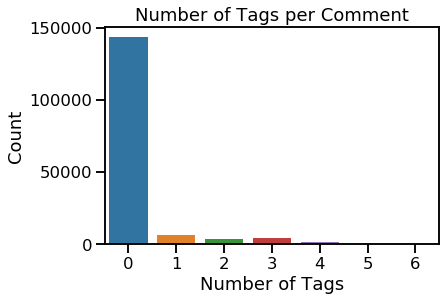

In [10]:
sns.countplot(data=eda_df, x='n_tags')
plt.xlabel('Number of Tags')
plt.ylabel('Count')
plt.title('Number of Tags per Comment')

In [11]:
toxic_comments = eda_df[tags].copy()

In [12]:
sum_per_category = toxic_comments.sum()

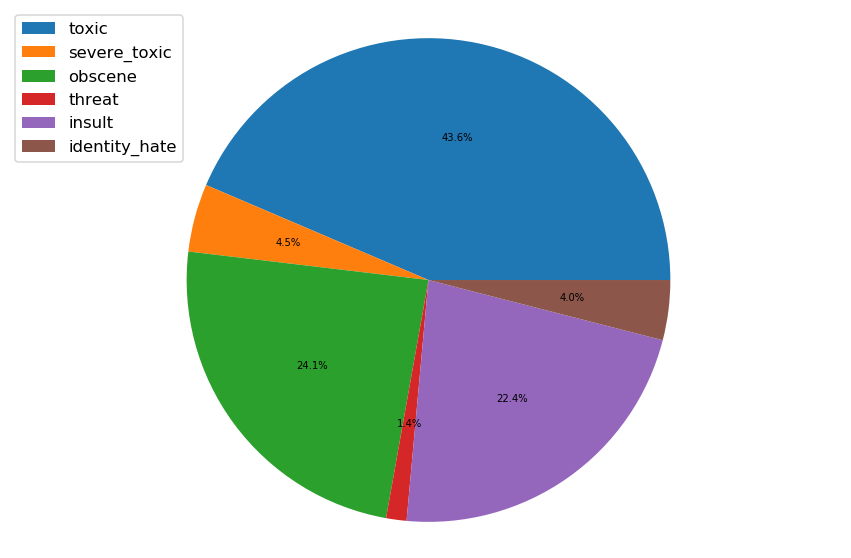

In [13]:
plt.figure(figsize=(15, 10))
plt.pie(sum_per_category.values, autopct="%0.1f%%")
plt.axis('equal')
plt.legend(sum_per_category.index)
plt.show()

### Correlations Between Tags

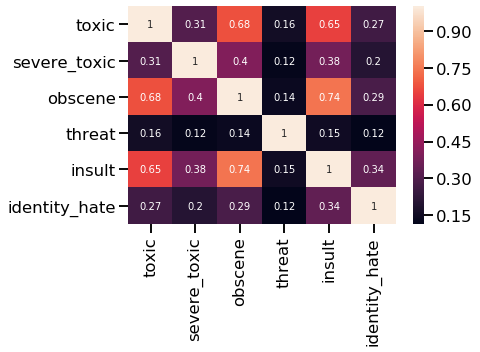

In [14]:
pearson_corr = toxic_comments.corr()
sns.heatmap(pearson_corr,
            xticklabels=pearson_corr.columns.values,
            yticklabels=pearson_corr.columns.values, annot=True);